## Worksheet

These questions will hopefully be pretty gentle and are for the most part entirely subjective. 

### Question 1 

Take the `heart_disease.csv` file from the github repository and read it into a dataframe. Visualise some of the different variables being measured - a description of the field columns can be found [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) - you will notice this is a subset of the original data. You might want to have a look at the pandas crosstab function for barplots with good examples [here](https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning) - this will hopefully make plotting a little easier! 

In [1]:
# solution 
import pandas as pd 
import statsmodels.api as sm
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.style as mpl
import scipy
from sklearn import neighbors
mpl.use(['fast'])
# url='https://github.com/shaneoconnell1996/data/blob/master/heart.csv'

df=pd.read_csv("heart_disease.csv",sep=',',index_col=0)

/home/shane/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [40]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,145,233,1,0,150,0,2.3,1
1,37,1,130,250,0,1,187,0,3.5,1
2,41,0,130,204,0,0,172,0,1.4,1
3,56,1,120,236,0,1,178,0,0.8,1
4,57,0,120,354,0,1,163,1,0.6,1


In [43]:
pd.crosstab(df.target,df.target) # kind of hacky but it does the job 



target,0,1
target,,
0,138,0
1,0,165


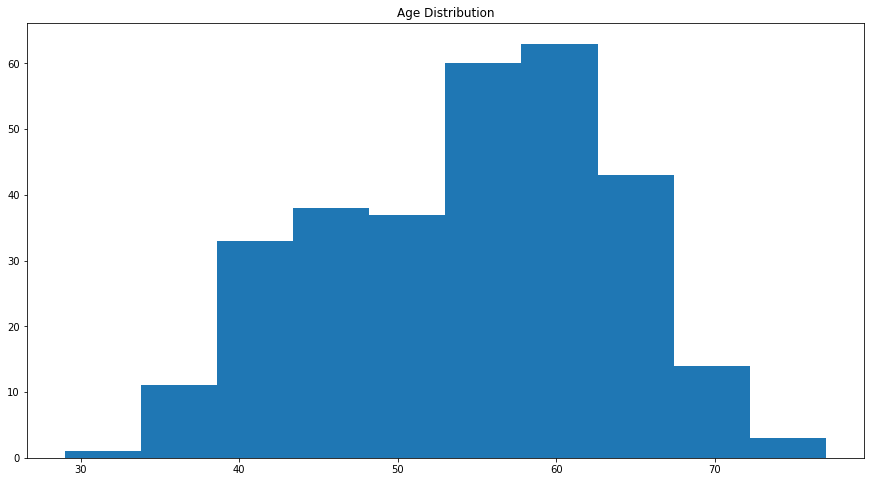

In [46]:
plt.figure(figsize=(15,8))

# plot age as histogram

plt.hist('age',data=df)
_=plt.title('Age Distribution')


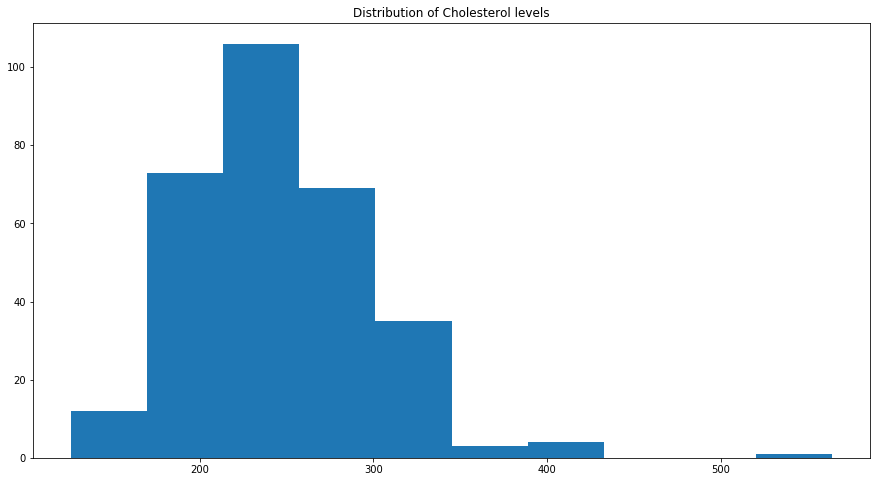

In [4]:
# plot the cholesterol in the same way 

plt.figure(figsize=(15,8))
plt.title('Distribution of Cholesterol levels')
_=plt.hist('chol',data=df)

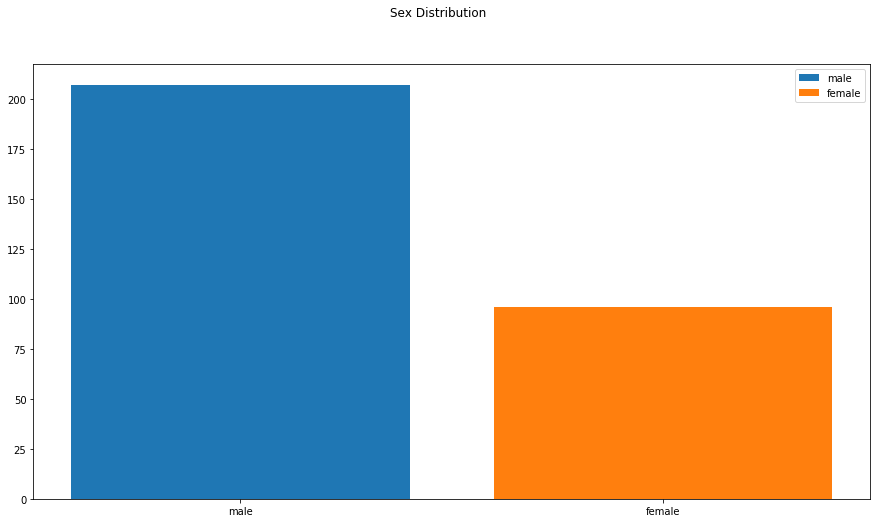

In [5]:
# plot sex distribution 
fig,ax=plt.subplots(figsize=(15,8))
fig.suptitle('Sex Distribution')
labels=['male','female']
ind=1
width=0.5

ax.bar(ind-width,len(df['sex'][df['sex']==1].values),label='male')

ax.bar(ind+width,len(df['sex'][df['sex']==0].values),label='female')

ax.set_xticks([0.5,1.5])
ax.set_xticklabels(labels)
_=ax.legend()

In [47]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


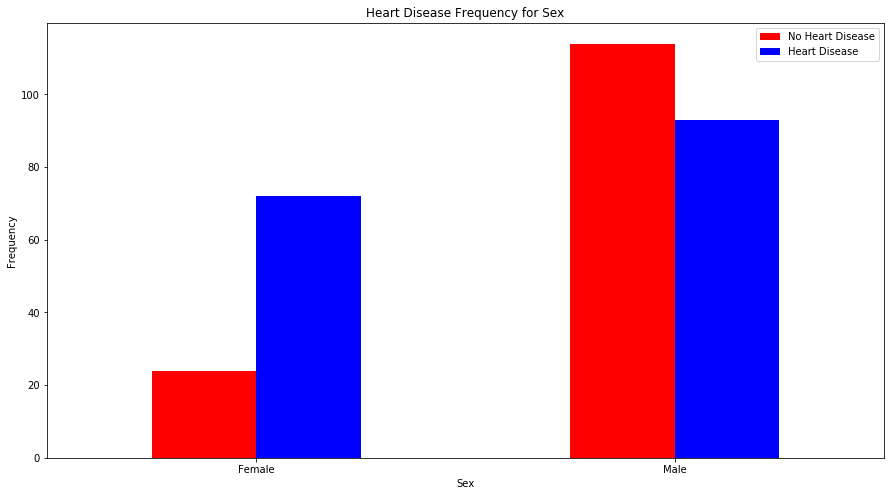

In [48]:
# some more with pd crosstab


fig,ax=plt.subplots(figsize=(15,8))
pd.crosstab(df.sex,df.target).plot(kind="bar",ax=ax,color=['red','blue' ])
ax.set_title('Heart Disease Frequency for Sex')
ax.set_xlabel('Sex')
ax.set_xticks([0,1])
ax.set_xticklabels(['Female','Male'],rotation=0)
ax.legend(["No Heart Disease", "Heart Disease"])
_=ax.set_ylabel('Frequency')

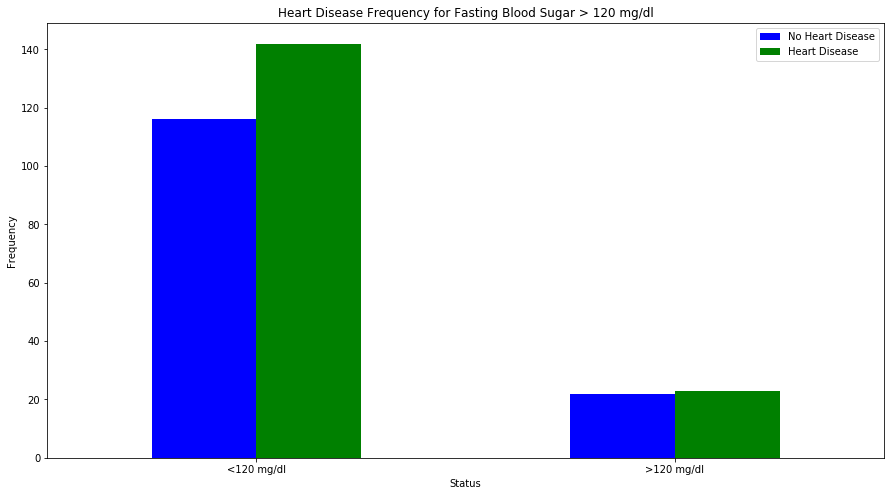

In [49]:
# do the same for the other categorical variables 



fig,ax=plt.subplots(figsize=(15,8))
pd.crosstab(df.fbs,df.target).plot(kind="bar",ax=ax,color=['blue','green' ])
ax.set_title('Heart Disease Frequency for Fasting Blood Sugar > 120 mg/dl')
ax.set_xlabel('Status')
ax.set_xticks([0,1])
ax.set_xticklabels(['<120 mg/dl','>120 mg/dl'],rotation=0)
ax.legend(["No Heart Disease", "Heart Disease"])
_=ax.set_ylabel('Frequency')

In [51]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


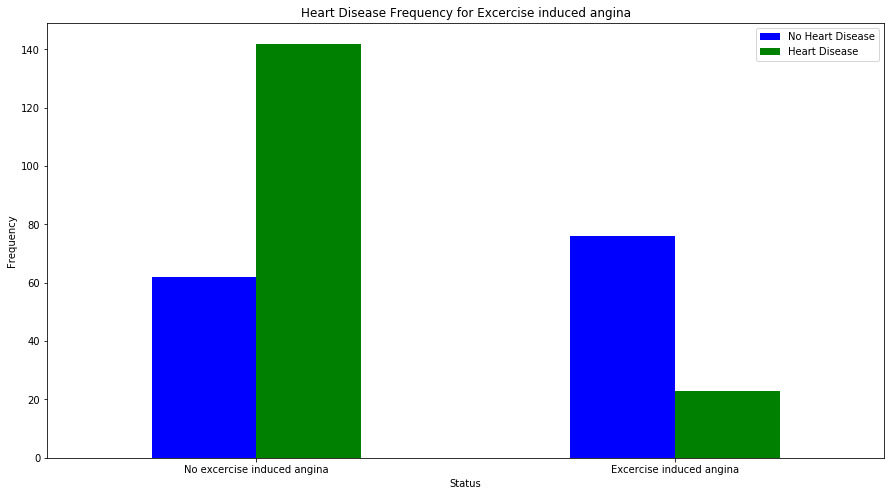

In [50]:

fig,ax=plt.subplots(figsize=(15,8))
pd.crosstab(df.exang,df.target).plot(kind="bar",ax=ax,color=['blue','green' ])
ax.set_title('Heart Disease Frequency for Excercise induced angina')
ax.set_xlabel('Status')
ax.set_xticks([0,1])
ax.set_xticklabels(['No excercise induced angina','Excercise induced angina'],rotation=0)
ax.legend(["No Heart Disease", "Heart Disease"])
_=ax.set_ylabel('Frequency')

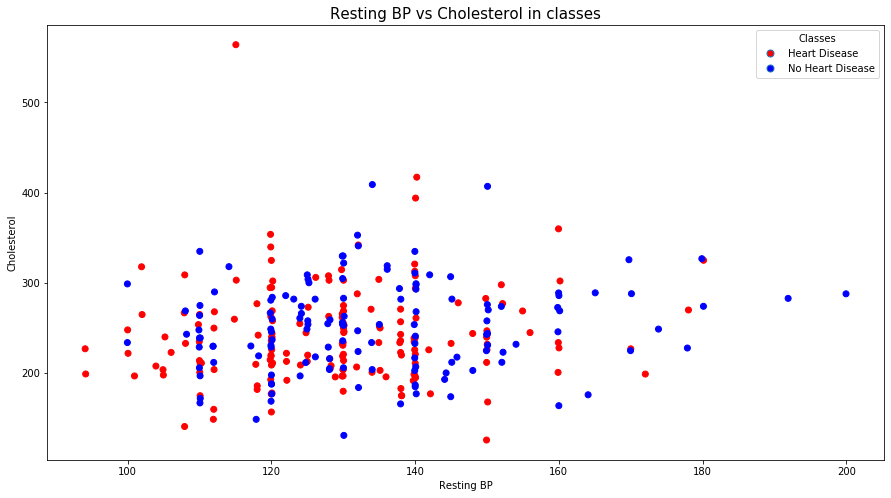

In [9]:
# a few scatterplots 
np.random.seed(45)
from matplotlib.lines import Line2D
fig,ax=plt.subplots(figsize=(15,8))
col_label=[]
for i in range(len(df['target'].values)):
    if df.target.values[i] == 1:
        col_label.append('red')
    else:
        col_label.append('blue')

        
# plot 2 continuous variables - say cholesterol and resting blood pressure coloured by group 
# and add some jitter
noise=np.random.normal(0,0.1,[len(df.target.values)])
ax.scatter(df.trestbps.values+noise,df.chol.values + noise,c=col_label)

legend_item=[Line2D([0], [0], marker='o', label='Heart Disease',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='No Heart Disease', linestyle='None',
                          markerfacecolor='blue', markersize=7)]
ax.set_xlabel('Resting BP')
ax.set_ylabel('Cholesterol')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('Resting BP vs Cholesterol in classes',fontsize=15)




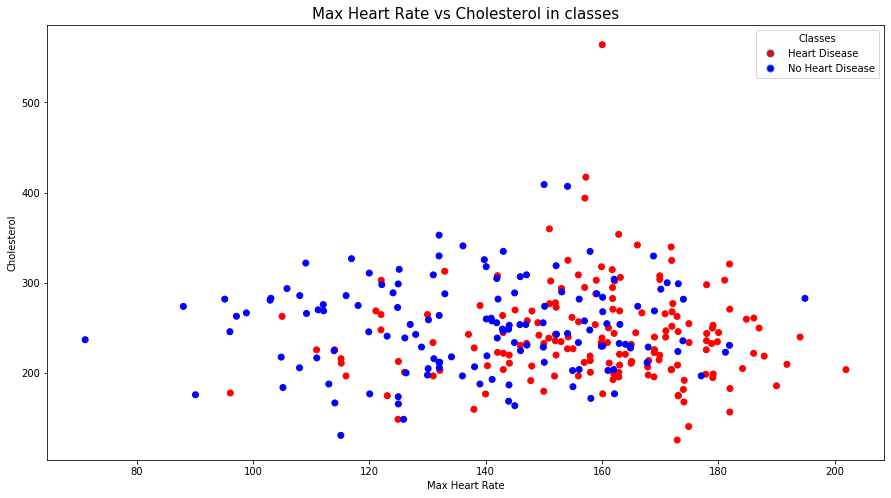

In [10]:
# maybe max heart rate vs cholestorol

# a few scatterplots 
np.random.seed(45)
from matplotlib.lines import Line2D
fig,ax=plt.subplots(figsize=(15,8))

noise=np.random.normal(0,0.1,[len(df.target.values)])
ax.scatter(df.thalach.values+noise,df.chol.values + noise,c=col_label)

legend_item=[Line2D([0], [0], marker='o', label='Heart Disease',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='No Heart Disease', linestyle='None',
                          markerfacecolor='blue', markersize=7)]
ax.set_xlabel('Max Heart Rate')
ax.set_ylabel('Cholesterol')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('Max Heart Rate vs Cholesterol in classes',fontsize=15)




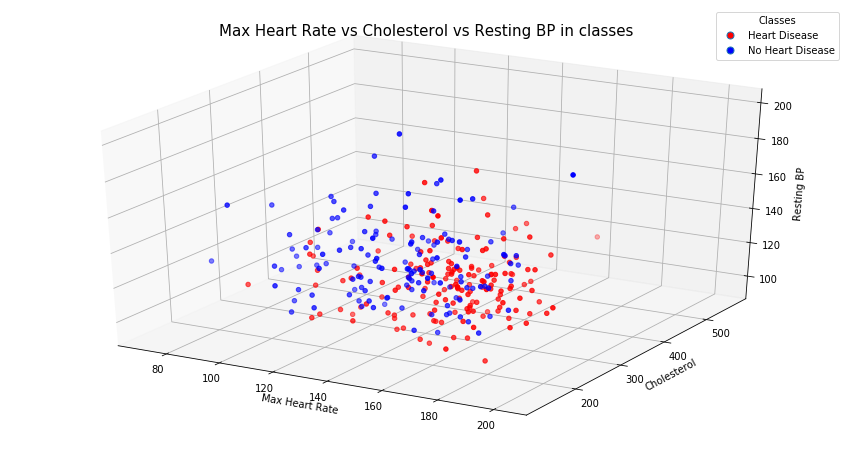

In [11]:
# 3 continuous vars vs each other coloured by class 
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(45)
from matplotlib.lines import Line2D
fig=plt.figure(figsize=(15,8))


ax=fig.add_subplot(projection='3d')

noise=np.random.normal(0,0.1,[len(df.target.values)])
sc=ax.scatter(df.thalach.values+noise,df.chol.values+noise,df.trestbps.values + noise,c=col_label)

legend_item=[Line2D([0], [0], marker='o', label='Heart Disease',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='No Heart Disease', linestyle='None',
                          markerfacecolor='blue', markersize=7)]
ax.set_xlabel('Max Heart Rate')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Resting BP')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('Max Heart Rate vs Cholesterol vs Resting BP in classes',fontsize=15)




### Question 2 

You might have noticed that some of the continuous variables show some separation between classes. Try to see if there is any separation in the PCA space using just the continuous variables. 

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# look at df to see the continuous vars 
df.head()
# so age,oldpeak,chol,trestbps,thalach
pca_df=df[['age','trestbps','chol','thalach','oldpeak']] # there are definitely better ways of doing this I am sure 

scaler=StandardScaler()
scaler.fit(pca_df)
standardised_df=scaler.transform(pca_df)

# now fit the PCA
pca=PCA(n_components=3)

pca.fit(standardised_df)

pca_values=pca.transform(pca_df.values)
# now plot below



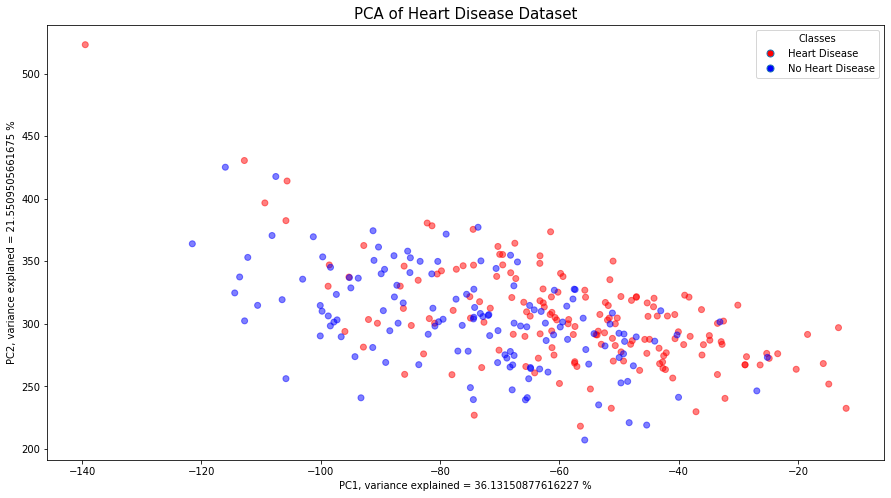

In [56]:
PC1=pca_values[:,0]
PC2=pca_values[:,1]


# now plot again
fig,ax=plt.subplots(figsize=(15,8))

sc=ax.scatter(PC1,PC2,c=col_label,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='Heart Disease',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='No Heart Disease', linestyle='None',
                          markerfacecolor='blue', markersize=7)]
ax.set_xlabel(f'PC1, variance explained = {pca.explained_variance_ratio_[0]*100} %')
ax.set_ylabel(f'PC2, variance explaned = {pca.explained_variance_ratio_[1]*100} %')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('PCA of Heart Disease Dataset',fontsize=15)


### Question 3 

Try to fit some models to this data, namely a logistic regression and a KNN (on continuous variables). Compare the performance of both against each other using a testing set. Based on your logistic regression, what variables appear to be important? Try to plot your results using the code from the tutorial or any other way you see fit. 


**Note that you shouldn't need to standardise these inputs but you can if you want**

In [14]:
# try a logistic regression first 

import statsmodels.api as sm

X=df.drop(['target'],axis=1)
Y=df.target.values.astype('int')

model_fit=sm.Logit(Y,X).fit()

model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.450985
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.3456
Time:                        13:31:43   Log-Likelihood:                -136.65
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.964e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0100      0.016     -0.610      0.542      -0.042       0.022
sex           -1.6243      0.354     -4.584      0.000      -2.319      -0.930
trestbps      -0.0093      0.009     -1.075      0.282      -0.026       0.008
chol          -0.0049      0.003     -1.618      0.106      -0.011       0.001
fbs            0.1749      0.415      0.422      0.673      -0.638       0.988
restecg        0.3763      0.287      1.312      0.189      -0.186       0.938
thalach        0.0342      0.007      5.047      0.000       0.021       0.047
exang         -1.3971      0.335     -4.174      0.000      -2.053      -0.741
oldpeak       -0.6003      0.149     -4.035      0.000      -0.892      -0.309
==============================================================================
"""

In [15]:
# the R squared is not great here - real world data often is not as easy to predict - also everything is 
# in different units - not too surprising

In [16]:
model_fit.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0015      0.002     -0.611      0.541      -0.006       0.003
sex           -0.2375      0.046     -5.188      0.000      -0.327      -0.148
trestbps      -0.0014      0.001     -1.081      0.280      -0.004       0.001
chol          -0.0007      0.000     -1.639      0.101      -0.002       0.000
fbs            0.0256      0.061      0.422      0.673      -0.093       0.144
restecg        0.0550      0.041      1.326      0.185      -0.026       0.136
thalach        0.0050      0.001      5.897      0.000       0.003       0.007
exang         -0.2043      0.044     -4.660      0.000      -0.290      -0.118
oldpeak       -0.0878      0.020     -4.487      0.000      -0.126      -0.049
==============================================================================
"""

In [57]:
# let's try standardising and see if the result changes

print(pca_df.columns)
total_standardised_df=df.assign(age=standardised_df[:,0],chol=standardised_df[:,2],
                               thalach=standardised_df[:,3],trestbps=standardised_df[:,1],
                               oldpeak=standardised_df[:,-1])
total_standardised_df
model_fit_standardised=sm.Logit(Y,total_standardised_df.drop(['target'],axis=1)).fit()

model_fit_standardised.summary()



Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.486503
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.2941
Time:                        15:28:19   Log-Likelihood:                -147.41
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 8.679e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0715      0.168     -0.425      0.671      -0.401       0.258
sex           -0.5565      0.240     -2.318      0.020      -1.027      -0.086
trestbps      -0.1833      0.159     -1.156      0.248      -0.494       0.127
chol          -0.0844      0.150     -0.562      0.574      -0.378       0.210
fbs            0.5139      0.404      1.273      0.203      -0.277       1.305
restecg        0.9890      0.243      4.063      0.000       0.512       1.466
thalach        0.6717      0.182      3.686      0.000       0.315       1.029
exang         -1.0420      0.322     -3.239      0.001      -1.672      -0.412
oldpeak       -0.8059      0.178     -4.520      0.000      -1.155      -0.456
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.592833
         Iterations 5


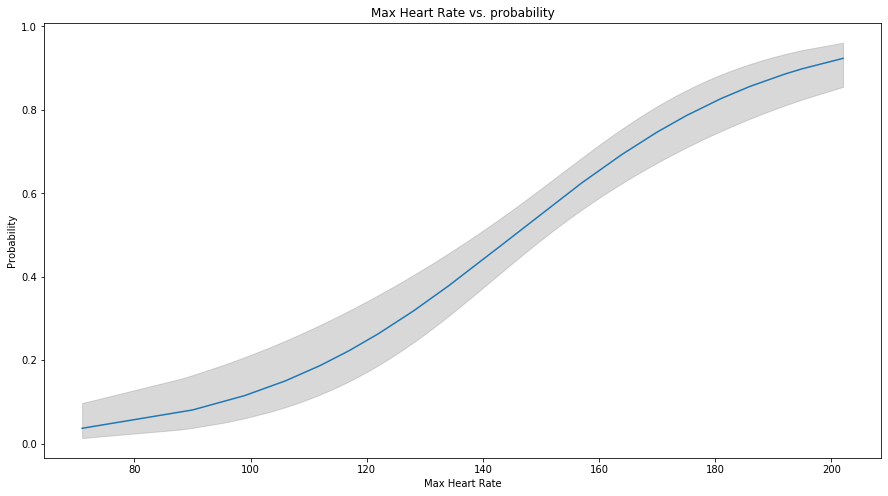

In [39]:
# let's try to plot our model using the functions from the tutorial 
import scipy
def invlogit(x): 
    result=scipy.special.expit(x)
    return(result)
def calc_se(model,X): 
    c=model.cov_params()
    vcov = np.dot(X, np.dot(c, X.T)) 
    se = np.sqrt(np.diag(vcov))
    return(se)

def make_model_pred_table(variable_to_plot,Y,name):

    X=sm.add_constant(variable_to_plot)
    model=sm.Logit(Y,X).fit()


# get all of our information

    pred_prob=model.predict()
    se=calc_se(model=model,X=X)
    
# create our sorting df so we can visualise the relationship between variables

    df_to_sort=pd.DataFrame({f"{name}":X[:,1],"prob":pred_prob,
                         "upr":invlogit(model.fittedvalues+(1.96*se)),
                        "lwr":invlogit(model.fittedvalues-(1.96*se))})


    sorted_df=df_to_sort.sort_values(by=[f'{name}'])
    return(sorted_df)

thalach_prob_df=make_model_pred_table(df.thalach.values,Y=df.target.values.astype('int'),name='Max Heart Rate')
plt.figure(figsize=(15,8))
plt.ylabel('Probability')
plt.plot('Max Heart Rate','prob',data=thalach_prob_df)
plt.xlabel('Max Heart Rate')
plt.fill_between('Max Heart Rate','upr','lwr',data=thalach_prob_df,color='gray',alpha=0.3)
_=plt.title('Max Heart Rate vs. probability')

Optimization terminated successfully.
         Current function value: 0.585805
         Iterations 6


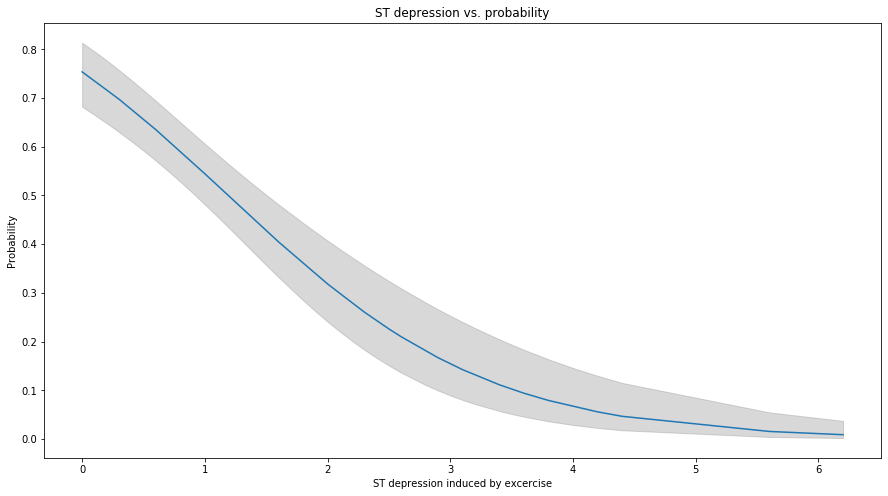

In [19]:
# let's try one of the other good predictors 


oldpeak_prob_df=make_model_pred_table(df.oldpeak.values,Y=df.target.values.astype('int'),name='oldpeak')
plt.figure(figsize=(15,8))
plt.ylabel('Probability')
plt.plot('oldpeak','prob',data=oldpeak_prob_df)
plt.xlabel('ST depression induced by excercise')
plt.fill_between('oldpeak','upr','lwr',data=oldpeak_prob_df,color='gray',alpha=0.3)
_=plt.title('ST depression vs. probability')

In [20]:
# model prediciton and performance compared to KNN with traintestsplit
from sklearn.model_selection import train_test_split
x_split=df.drop(['target'],axis=1)
y_split=df.target.values
x_train,x_test,y_train,y_test=train_test_split(x_split,
                                               y_split,
                                               test_size=0.3,random_state=30)

x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)
#logit
train_model=sm.Logit(y_train,x_train).fit()
pred_vector=[]


for i in train_model.predict(x_test).values:
    if i > 0.5:
        pred_vector.append(1)
    else:
        pred_vector.append(0)

        
# use some of the accuracy metrics from sklearn to get a prediction 

from sklearn.metrics import accuracy_score
print(f'Logreg Accuracy = {accuracy_score(y_test,pred_vector) * 100}%')


# vs KNN 



Optimization terminated successfully.
         Current function value: 0.432577
         Iterations 7
Logreg Accuracy = 79.12087912087912%


/home/shane/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimal K = 5


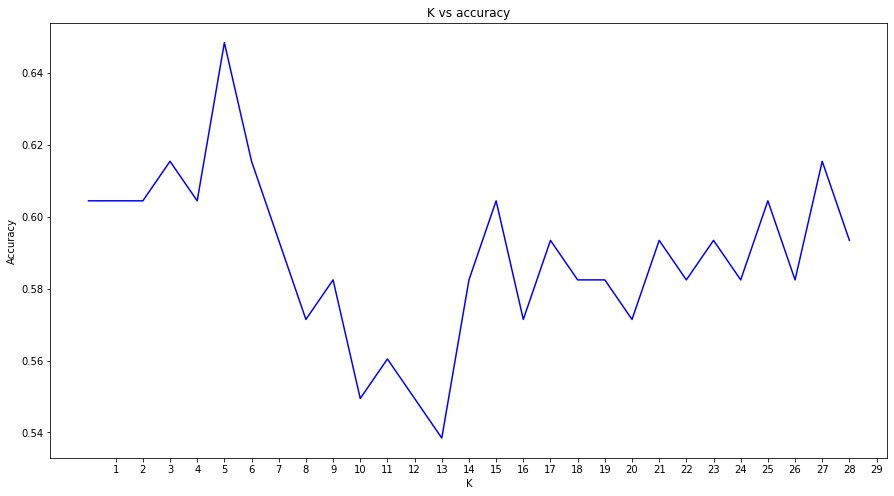

In [60]:
# get optimal K 
    
from sklearn import neighbors
accuracy_k=[]
for k in range(1,30):
    knn=neighbors.KNeighborsClassifier(k,weights='distance')
    
    knn.fit(x_train.drop(['sex','fbs','exang','restecg'],axis=1),y_train)
    knn_pred=knn.predict(x_test.drop(['sex','fbs','exang','restecg'],axis=1))
    
    accuracy_k.append(accuracy_score(y_test,knn_pred))
    
plt.figure(figsize=(15,8))

plt.plot(accuracy_k,c='blue')
plt.title('K vs accuracy')
plt.xlabel('K')
plt.xticks(range(1,30))
_=plt.ylabel('Accuracy')
print(f'Optimal K = {np.argmax(accuracy_k)}')

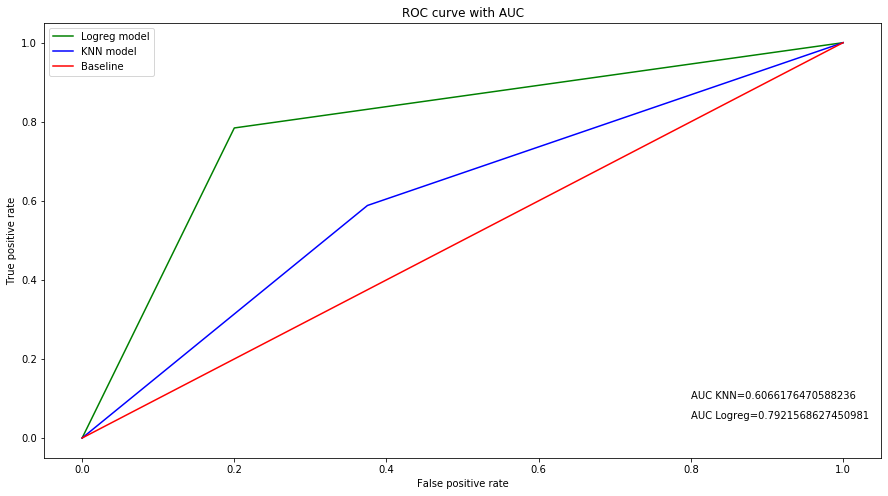

In [61]:
# make roc curves with both models and see how they do 

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

knn=neighbors.KNeighborsClassifier(5,weights='distance')
knn.fit(x_train.drop(['sex','fbs','exang','restecg'],axis=1),y_train)
knn_pred_vec=knn.predict(x_test.drop(['sex','fbs','exang','restecg'],axis=1))

fpr_log, tpr_log, _ = roc_curve(y_test, pred_vector)
fpr_knn, tpr_knn, _ = roc_curve(y_test,knn_pred_vec)

# get the AUC, which is the area under this curve. The higher, the better. 

auc_log=auc(fpr_log,tpr_log)
auc_knn=auc(fpr_knn,tpr_knn)
plt.figure(figsize=(15,8))
plt.plot(fpr_log,tpr_log,label='Logreg model',c='green')
plt.plot(fpr_knn,tpr_knn,label='KNN model',c='blue')
plt.plot([0,1],c='red',label='Baseline')
plt.legend()
plt.text(x=0.8,y=0.05,s=f'AUC Logreg={auc_log}')
plt.text(x=0.8,y=0.1,s=f'AUC KNN={auc_knn}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_=plt.title('ROC curve with AUC')

## Question 4 

Rerun models with PCA values

In [62]:
#using the code from above... 
scaler=StandardScaler()
scaler.fit(pca_df)
standardised_df=scaler.transform(pca_df)

# now fit the PCA
pca=PCA(n_components=5) # add a few more components to get more variance explained 

pca.fit(standardised_df)

pca_values=pca.transform(pca_df.values)


# do your training and test split 

x_pca_split=pca_values
 # y_split=df.target.values - hashed out because the var is already defined 
x_train,x_test,y_train,y_test=train_test_split(x_pca_split,
                                               y_split,
                                               test_size=0.3,random_state=30)


# fit logistic regression 

pca_logit_mod=sm.Logit(y_train,x_train).fit()

pca_logit_mod.summary()

# fit a knn with the optimal K from above 

knn_pca=neighbors.KNeighborsClassifier(5,weights='distance')
knn_pca.fit(x_train,y_train)





Optimization terminated successfully.
         Current function value: 0.522532
         Iterations 6


KNeighborsClassifier(weights='distance')

In [64]:
 # prediction and validation
pred_vector_pca=[]


for i in pca_logit_mod.predict(x_test):
    if i > 0.5:
        pred_vector_pca.append(1)
    else:
        pred_vector_pca.append(0)
    
knn_pred_pca=knn_pca.predict(x_test)



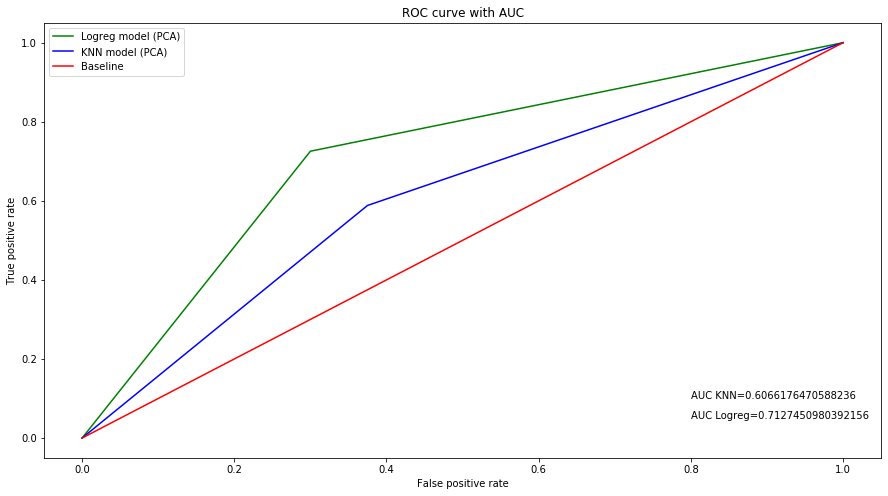

In [65]:
# validation with everything 


fpr_log_pca, tpr_log_pca, _ = roc_curve(y_test, pred_vector_pca)
fpr_knn_pca, tpr_knn_pca, _ = roc_curve(y_test,knn_pred_pca)

# get the AUC, which is the area under this curve. The higher, the better. 

auc_log_pca=auc(fpr_log_pca,tpr_log_pca)
auc_knn_pca=auc(fpr_knn_pca,tpr_knn_pca)
plt.figure(figsize=(15,8))
plt.plot(fpr_log_pca,tpr_log_pca,label='Logreg model (PCA)',c='green')
plt.plot(fpr_knn_pca,tpr_knn_pca,label='KNN model (PCA)',c='blue')
plt.plot([0,1],c='red',label='Baseline')
plt.legend()
plt.text(x=0.8,y=0.05,s=f'AUC Logreg={auc_log_pca}')
plt.text(x=0.8,y=0.1,s=f'AUC KNN={auc_knn_pca}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_=plt.title('ROC curve with AUC')

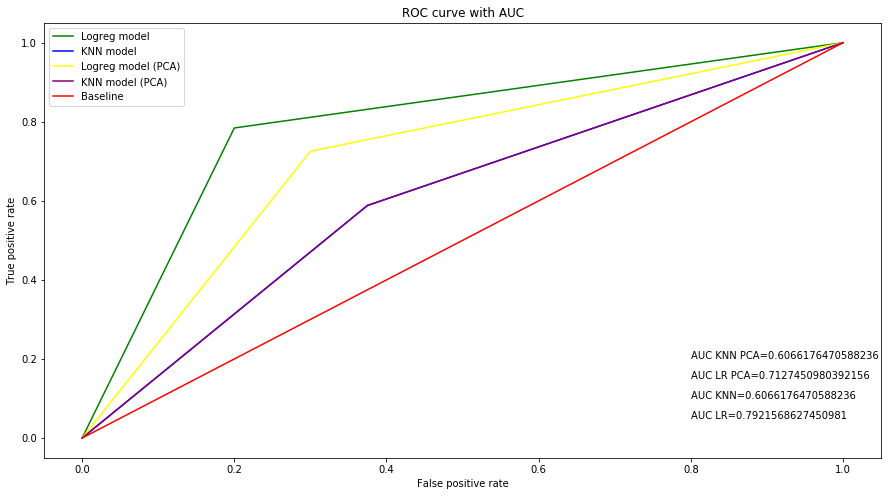

In [66]:
# compare everything 


plt.figure(figsize=(15,8))
plt.plot(fpr_log,tpr_log,label='Logreg model',c='green')
plt.plot(fpr_knn,tpr_knn,label='KNN model',c='blue')
plt.plot(fpr_log_pca,tpr_log_pca,label='Logreg model (PCA)',c='yellow')
plt.plot(fpr_knn_pca,tpr_knn_pca,label='KNN model (PCA)',c='purple')
plt.plot([0,1],c='red',label='Baseline')
plt.legend()
plt.text(x=0.8,y=0.05,s=f'AUC LR={auc_log}')
plt.text(x=0.8,y=0.1,s=f'AUC KNN={auc_knn}')
plt.text(x=0.8,y=0.15,s=f'AUC LR PCA={auc_log_pca}')
plt.text(x=0.8,y=0.2,s=f'AUC KNN PCA={auc_knn_pca}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_=plt.title('ROC curve with AUC')

In [67]:
# compare the accuracies 


print(f'Prediction accuracy of Logreg on PCs = {accuracy_score(y_test,pred_vector_pca) * 100} %')
print(f'Prediction accuracy of KNN on PCs = {accuracy_score(y_test,knn_pred_pca) * 100} %')
print(f'Prediction accuracy of Logreg = {accuracy_score(y_test,pred_vector) * 100} %')
print(f'Prediction accuracy of KNN = {accuracy_score(y_test,knn_pred_vec) * 100} %')

Prediction accuracy of Logreg on PCs = 71.42857142857143 %
Prediction accuracy of KNN on PCs = 60.43956043956044 %
Prediction accuracy of Logreg = 79.12087912087912 %
Prediction accuracy of KNN = 60.43956043956044 %


Optimal K = 37


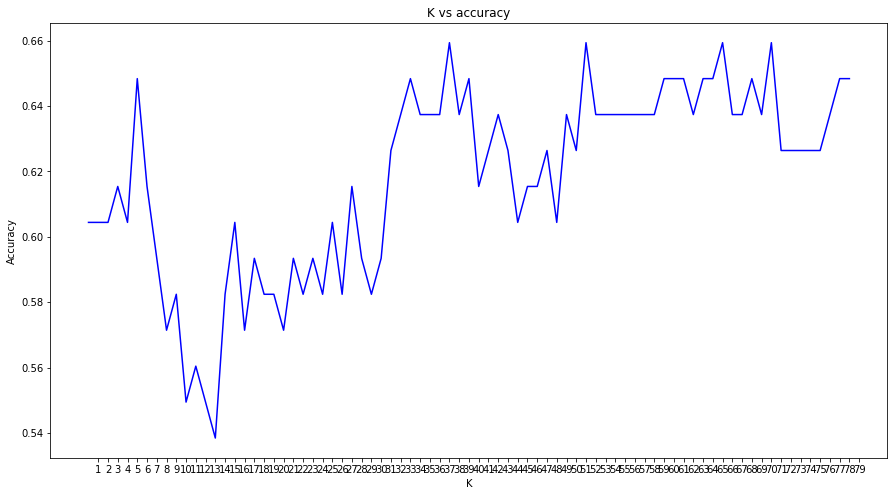

In [69]:
# let's just tune to be sure 
accuracy_k=[]
for k in range(1,80):
    knn=neighbors.KNeighborsClassifier(k,weights='distance')
    
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    accuracy_k.append(accuracy_score(y_test,knn_pred))
    
plt.figure(figsize=(15,8))

plt.plot(accuracy_k,c='blue')
plt.title('K vs accuracy')
plt.xlabel('K')
plt.xticks(range(1,80))
_=plt.ylabel('Accuracy')
print(f'Optimal K = {np.argmax(accuracy_k)}')

In [70]:
# could we improve this even further ? Let's try taking the 5 PCs and also using the categorical variables from
# before as well 

PCs_and_categorical_data=pd.DataFrame({"PC1":pca_values[:,0],
                                      "PC2":pca_values[:,1],
                                      "PC3":pca_values[:,2],
                                      "PC4":pca_values[:,3],
                                      "PC5":pca_values[:,4],
                                      "sex":df.sex.values,
                                      "fbs":df.fbs.values,
                                      "exang":df.exang.values,
                                      "restecg":df.restecg.values})



In [71]:
 # y_split=df.target.values - hashed out because the var is already defined 
x_train,x_test,y_train,y_test=train_test_split(PCs_and_categorical_data,
                                               y_split,
                                               test_size=0.3,random_state=30)


# fit logistic regression 

pca_logit_mod_cat=sm.Logit(y_train,x_train).fit()
final_pred_vec=[]
for i in pca_logit_mod_cat.predict(x_test):
    if i > 0.5:
        final_pred_vec.append(1)
    else:
        final_pred_vec.append(0)
print(f'Logreg accuracy on PC\'s and categorical data:{accuracy_score(y_test,final_pred_vec) * 100} %')


Optimization terminated successfully.
         Current function value: 0.433030
         Iterations 7
Logreg accuracy on PC's and categorical data:78.02197802197803 %


**A Note on the data**
You may have noticed restecg was included here - it was not a true categorical variable and should have been removed! This was my mistake and I will talk a little about why you have to be careful with these values in the future.

In [72]:
pca_logit_mod_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.3727
Time:                        15:46:45   Log-Likelihood:                -91.802
converged:                       True   LL-Null:                       -146.34
Covariance Type:            nonrobust   LLR p-value:                 5.881e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.3392      0.089      3.792      0.000       0.164       0.514
PC2            0.2159      0.061      3.536      0.000       0.096       0.336
PC3            0.1466      0.045      3.273      0.001       0.059       0.234
PC4           -0.4816      0.145     -3.328      0.001      -0.765      -0.198
PC5            0.1782      0.062      2.876      0.004       0.057       0.300
sex           -1.7970      0.444     -4.050      0.000      -2.667      -0.927
fbs           -0.1665      0.551     -0.302      0.762      -1.246       0.913
exang         -1.3259      0.423     -3.136      0.002      -2.154      -0.497
restecg        0.2278      0.358      0.636      0.525      -0.474       0.930
==============================================================================
"""

In [74]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.3456
Time:                        15:47:53   Log-Likelihood:                -136.65
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.964e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0100      0.016     -0.610      0.542      -0.042       0.022
sex           -1.6243      0.354     -4.584      0.000      -2.319      -0.930
trestbps      -0.0093      0.009     -1.075      0.282      -0.026       0.008
chol          -0.0049      0.003     -1.618      0.106      -0.011       0.001
fbs            0.1749      0.415      0.422      0.673      -0.638       0.988
restecg        0.3763      0.287      1.312      0.189      -0.186       0.938
thalach        0.0342      0.007      5.047      0.000       0.021       0.047
exang         -1.3971      0.335     -4.174      0.000      -2.053      -0.741
oldpeak       -0.6003      0.149     -4.035      0.000      -0.892      -0.309
==============================================================================
"""

In [76]:
print(np.exp(0.3763))

1.456884133457893
